>  # **SMS OR EMAIL SPAM CLASSIICATION BY USING NLP**

![SPAM](https://camo.githubusercontent.com/231fa52b44adb8e718956a5a3425466a1ceb9c9c234df22fba77f0410b4b30e0/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f313430302f302a6d624642506350554a442d35337633682e706e67)

In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [51]:
df = pd.read_csv('./spam.csv',encoding='latin-1',index_col=False)


In [52]:
more = pd.read_csv('./train.csv',encoding='latin-1',index_col=False)

In [53]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2518,ham,Joy's father is John. Then John is the NAME of...,NaN,NaN,NaN
2199,ham,Not sure I have the stomach for it ...,NaN,NaN,NaN
550,ham,Imagine you finally get to sink into that bath...,NaN,NaN,NaN
852,ham,No da if you run that it activate the full ver...,NaN,NaN,NaN
1536,ham,How's it feel? Mr. Your not my real Valentine ...,NaN,NaN,NaN
1966,ham,What's a feathery bowa? Is that something guys...,NaN,NaN,NaN
586,ham,"I dun thk i'll quit yet... Hmmm, can go jazz ?...",NaN,NaN,NaN
602,ham,Speaking of does he have any cash yet?,NaN,NaN,NaN
703,ham,"Thats a bit weird, even ?- where is the do sup...",NaN,NaN,NaN
1064,ham,"That's fine, I'll bitch at you about it later ...",NaN,NaN,NaN


In [54]:
more.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2692,ham,I have gone into get info bt dont know what to do,NaN,NaN,NaN
855,ham,"Mon okie lor... Haha, best is cheap n gd food ...",NaN,NaN,NaN
2192,ham,Especially since i talk about boston all up in...,NaN,NaN,NaN
1707,spam,WELL DONE! Your 4* Costa Del Sol Holiday or ...,NaN,NaN,NaN
2567,ham,K k:) sms chat with me.,NaN,NaN,NaN


# **1. Data Cleaning**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          2590 non-null   object
 1   v2          2590 non-null   object
 2   Unnamed: 2  23 non-null     object
 3   Unnamed: 3  6 non-null      object
 4   Unnamed: 4  3 non-null      object
dtypes: object(5)
memory usage: 101.3+ KB


In [56]:
#Columns (Unnamed: 2, Unnamed: 3, Unnamed: 4) have so much null value so we are going to drop these columns

In [57]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [58]:
more.drop(columns=['v1','Unnamed: 3'],inplace=True)

In [59]:
df.sample(3)

,v1,v2
1388,ham,Oh k.i think most of wi and nz players unsold.
573,ham,Waiting for your call.
1648,ham,If u laugh really loud.. If u talk spontaneous...


In [60]:
more.sample(3)

,v2,Unnamed: 2,Unnamed: 4
1149,No da. . Vijay going to talk in jaya tv,NaN,NaN
1233,I miss you so much I'm so desparate I have rec...,NaN,NaN
1661,"Send ur birthdate with month and year, I will ...",NaN,NaN


In [61]:
#Renaming the columns...
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
500,ham,"Fighting with the world is easy, u either win ..."
1465,spam,YOU 07801543489 are guaranteed the latests Nok...
480,ham,"Almost there, see u in a sec"
855,spam,Talk sexy!! Make new friends or fall in love i...
2173,ham,"Hiya, had a good day? Have you spoken to since..."


In [62]:
concatenated_df = pd.concat([df, more], axis=0, ignore_index=True)

In [63]:
df = concatenated_df

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [65]:
df['target'] = encoder.fit_transform(df['target'])

In [66]:
df.head(3)

,target,text,v2,Unnamed: 2,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [67]:
#Checking for misssing values...
df.isnull().sum()

target           0
text          2982
v2            2590
Unnamed: 2    5545
Unnamed: 4    5569
dtype: int64

In [68]:
#checking for duplicate...
df.duplicated().sum()

231

In [69]:
#Removing Duplicates.......
df = df.drop_duplicates(keep='first')

# **2. EDA And Feature Enge...**

In [70]:
df['target'].value_counts()

target
2    2862
0    2144
1     335
Name: count, dtype: int64

In [71]:
#Data is imbalanced so we have to take care of this 

In [72]:
from matplotlib import pyplot as plt

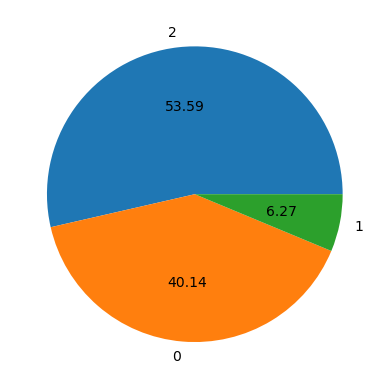

In [74]:
target_counts = df['target'].value_counts()

labels = target_counts.index  # Automatically fetch unique values as labels

plt.pie(target_counts, labels=labels, autopct="%0.2f")
plt.show()


In [75]:
import nltk

In [76]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VAIBHAV\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VAIBHAV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
#Creating new Feature (num_of_Character)

In [79]:
df['num_of_character'] = df['text'].fillna('').apply(len)

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_37960\516502087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_character'] = df['text'].fillna('').apply(len)


In [80]:
#Creating new feature (num of words)

In [82]:
import nltk

df['num_word'] = df['text'].fillna('').apply(lambda x: len(nltk.word_tokenize(x)))


C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_37960\1185925519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word'] = df['text'].fillna('').apply(lambda x: len(nltk.word_tokenize(x)))


In [83]:
#Creating new feature (num_sentences)

In [85]:
import nltk

df['num_sentence'] = df['text'].fillna('').apply(lambda x: len(nltk.sent_tokenize(x)))


C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_37960\3963235901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['text'].fillna('').apply(lambda x: len(nltk.sent_tokenize(x)))


In [86]:
df[['num_of_character','num_word','num_sentence']].describe()

,num_of_character,num_word,num_sentence
count,5341.000000,5341.000000,5341.000000
mean,37.746302,8.809399,0.944018
std,59.013309,13.722326,1.501077
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,56.000000,14.000000,1.000000
max,910.000000,220.000000,38.000000


In [87]:
#Analysis where target == 0 i.e. ham......
df[df['target'] == 0][['num_of_character','num_word','num_sentence']].describe()

,num_of_character,num_word,num_sentence
count,2144.000000,2144.000000,2144.000000
mean,72.237873,17.574160,1.880597
std,61.918529,14.968348,1.579062
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.250000,22.250000,2.000000
max,910.000000,220.000000,38.000000


### As we see by above result ham sms is when....
* mean(num_of_character) is approx 70
* mean(num_word) is approx 16
* mean(num_sentence) is approx 2

In [88]:
#Analysis where target == 1 i.e. spam...
df[df['target'] == 1][['num_of_character','num_word','num_sentence']].describe() 

,num_of_character,num_word,num_sentence
count,335.000000,335.000000,335.000000
mean,139.477612,27.976119,3.014925
std,29.236266,6.815316,1.567756
min,30.000000,5.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,150.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### As we see by above result spam sms is when....
* mean(num_of_character) is greater than 100
* mean(num_word) is greater than 20
* mean(num_sentence) is approx 2

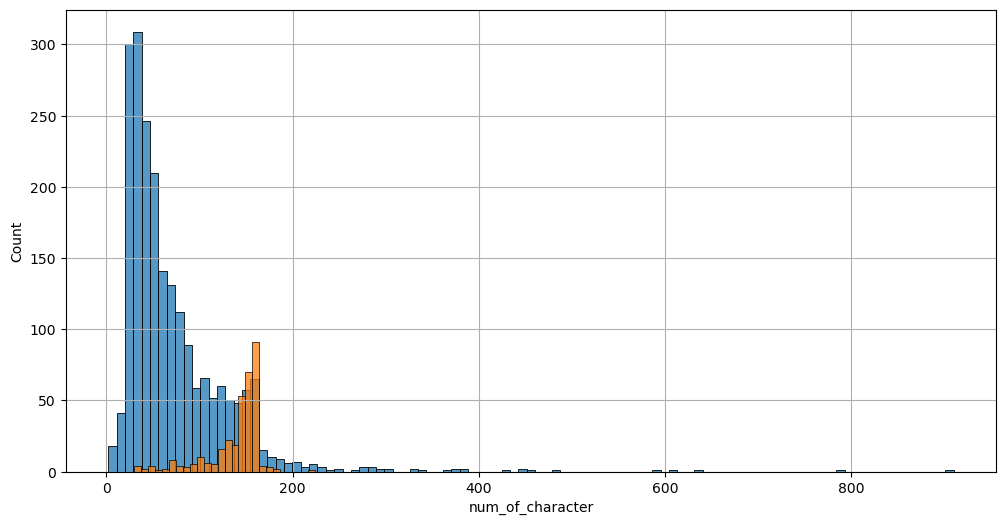

In [89]:
#Now see these conclusions by graphically
import seaborn as sns 
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_character'])
sns.histplot(df[df['target'] == 1]['num_of_character'])
plt.grid()

> As we see by graphicaly taget is depend on column (num_of_character)

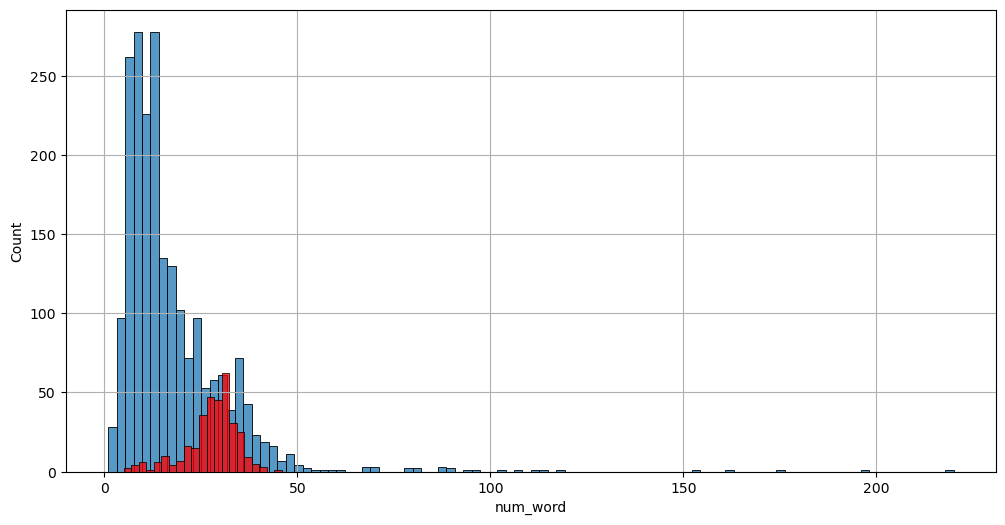

In [90]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_word'])
sns.histplot(df[df['target'] == 1]['num_word'],color='red')
plt.grid()

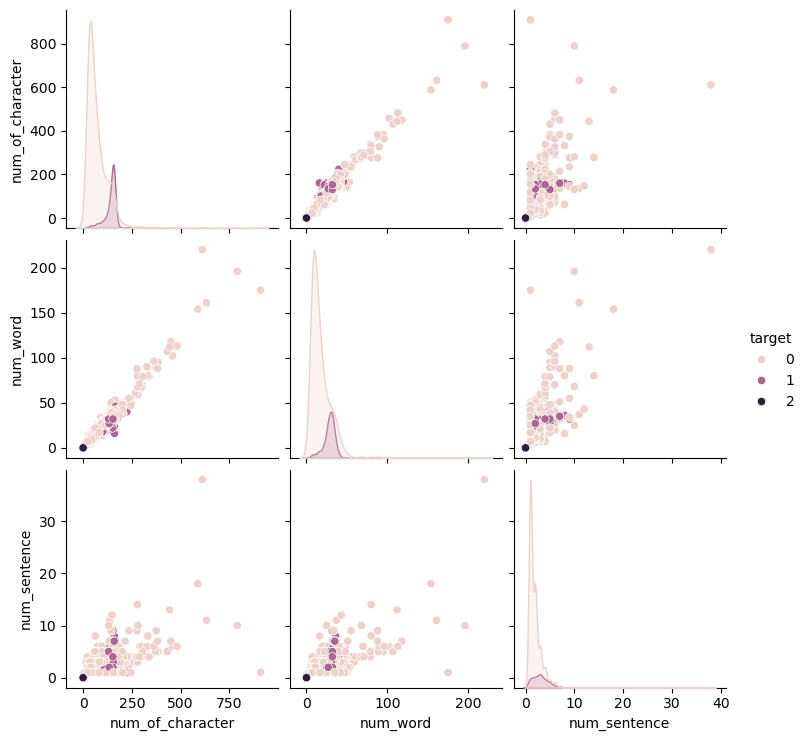

In [91]:
sns.pairplot(df,hue='target')
plt.grid()

<Axes: >

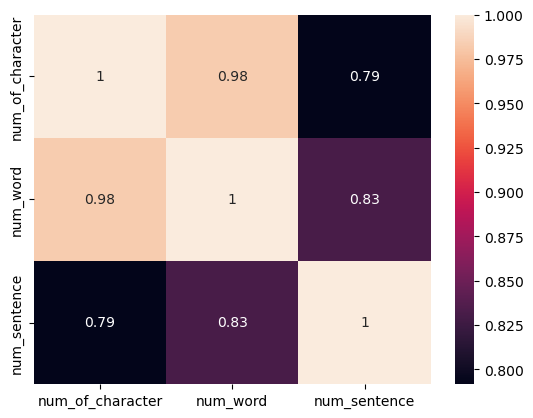

In [92]:
sns.heatmap(df[['num_of_character','num_word','num_sentence']].corr(),annot=True)

# **3. Data Preprocessing** 

* Lower Case
* Tokenization
* Removing Special Character
* Removing Stop words and punctuation
* Stemming

In [93]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [94]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
    
    

In [95]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [96]:
#For example how this function work actually...
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [98]:
df['transformed_text'] = df['text'].fillna('').apply(transform_text)

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_37960\1824431183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].fillna('').apply(transform_text)


In [99]:
df.head(5)

,target,text,v2,Unnamed: 2,Unnamed: 4,num_of_character,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


In [101]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color = 'white')

In [102]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

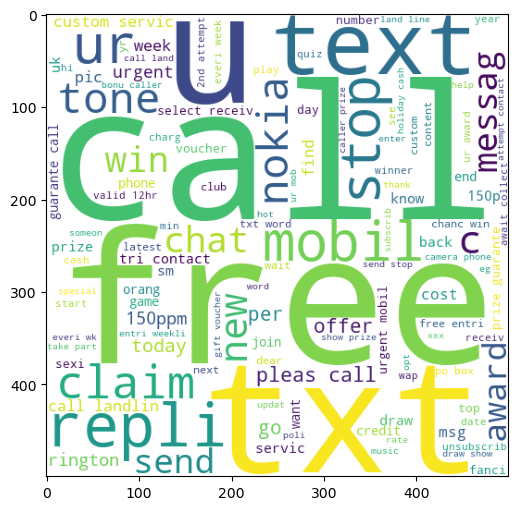

In [103]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [104]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

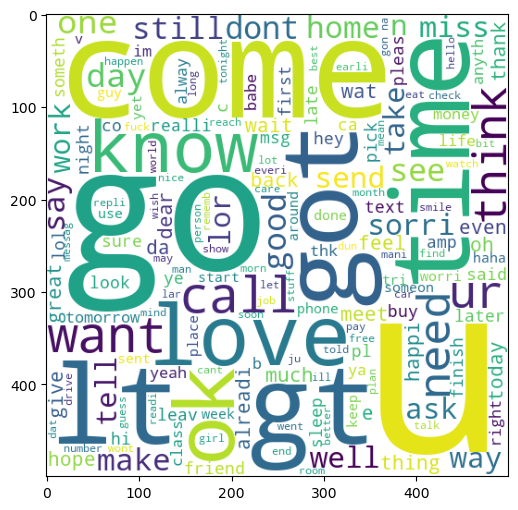

In [105]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

# **4. Model Building**

In [106]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 4000)

In [107]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [108]:
x.shape

(5341, 4000)

In [109]:
y = df['target'].values

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 20)

In [112]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [113]:
gnb = GaussianNB()
mnb = MultinomialNB(alpha=1.0)
bnb = BernoulliNB()

In [115]:
from sklearn.metrics import accuracy_score, precision_score

gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)

print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1, average='weighted'))

0.9326473339569691
0.947049143631256


In [117]:
from sklearn.metrics import accuracy_score, precision_score

mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)

print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2, average='weighted'))

0.9036482694106641
0.9112968707052531


In [121]:
from sklearn.metrics import accuracy_score, precision_score

bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)

print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3, average = 'weighted'))

0.8999064546304958
0.906527149090393


In [122]:
import pickle
pickle.dump(tfidf,open('nlp_vectorizer1.pkl','wb'))
pickle.dump(mnb,open('nlp_model1.pkl','wb'))

# **5. Testing**

In [123]:
pred = mnb.predict(x_test)

In [124]:
pred

array([2, 0, 2, ..., 2, 0, 0])

In [125]:
y_test

array([2, 0, 1, ..., 2, 0, 0])